In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from models import nextsim

In [2]:
##directory storing the nextsim restart files
path = "/cluster/work/users/yingyue/data/nextsim_ens"

t = datetime(2007,1,10)

##nextsim use a unstructured mesh, get the Grid obj
grid = nextsim.get_grid(path, member=0, time=t)

##read concentration, thickness and drift velocity fields
sic = nextsim.get_var(path, grid, name='seaice_conc', member=0, time=t)
sit = nextsim.get_var(path, grid, name='seaice_thick', member=0, time=t)
siv = nextsim.get_var(path, grid, name='seaice_velocity', member=0, time=t)

In [18]:
print('number of elements (triangles):', len(grid.tri.triangles))
print('number of nodes:', len(grid.x)) ##grid.x, grid.y are the nodal coordinates

##the conc,thick are defined on elements, while velocity is defined on nodal points.
## velocity has two components (u,v) as the first dimension=2
print('sic dimension:', sic.shape)
print('siv dimension:', siv.shape)

number of elements (triangles): 130736
number of nodes: 67386
sic dimension: (130736,)
siv dimension: (2, 67386)


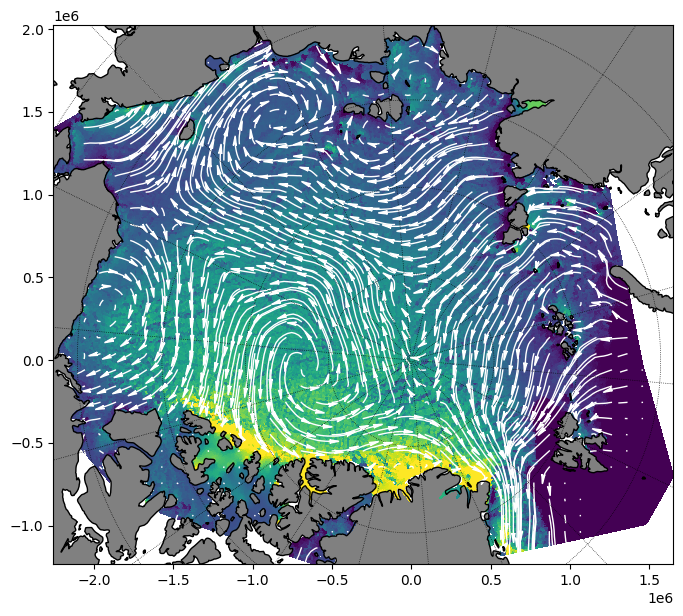

In [26]:
##visualise the data
fig, ax = plt.subplots(1, 1, figsize=(8,7))

##plot_field use tripcolor to plot both nodal and element variables
#grid.plot_field(ax, sic, vmin=0, vmax=1, cmap='Blues_r')
grid.plot_field(ax, sit, vmin=0, vmax=3)

##plot drift velocity as vector field
grid.plot_vectors(ax, siv, linecolor='w')

##show the map
grid.plot_land(ax, color='gray')

(-1200000.0, 0.0)

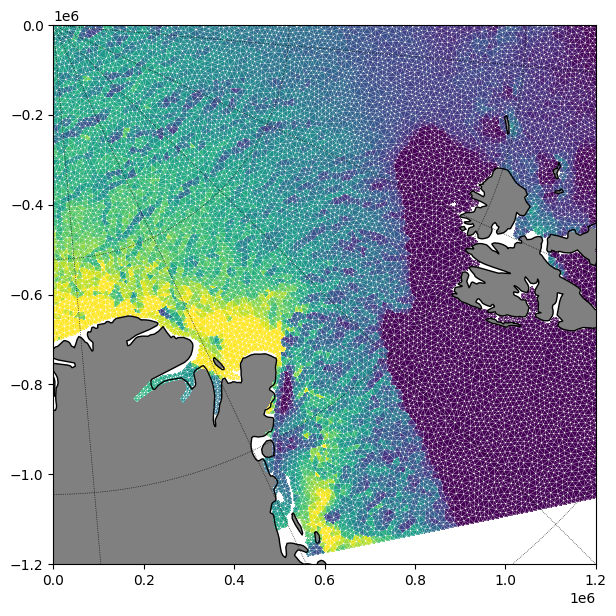

In [16]:
##zoom in on the Fram Strait and show the triangular mesh
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.tripcolor(grid.tri, sit, vmin=0, vmax=3)
ax.triplot(grid.tri, color='w', linewidth=0.2)
grid.plot_land(ax, color='gray')
ax.set_xlim(0, 1.2e6)
ax.set_ylim(-1.2e6, 0)

In [24]:
##deformation